In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
df.shape

(891, 12)

In [244]:
df1 = df.copy()

In [245]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [246]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null
1,Cabin,687,77.104377
0,Age,177,19.865320
2,Embarked,2,0.224467


In [247]:
feat_to_drop = nv_df['Features'][nv_df['Per_Null']>=50].values
print(feat_to_drop)

['Cabin']


In [248]:
df.drop(feat_to_drop,axis=1,inplace=True)
print(df.shape)
print(df.columns)

(891, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [249]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [250]:
df=df.dropna()

In [251]:
count_per_null(df)

,Features,Count_Null,Per_Null


In [252]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [253]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [254]:
df.duplicated().sum()

0

In [255]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [256]:
df.shape

(889, 11)

In [257]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [258]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)
print(df.shape)
print(df.columns)

(889, 9)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')


In [259]:
for i in df.columns:
    print(f'{i}-{df[i].nunique()}')

Survived-2
Pclass-3
Sex-2
Age-89
SibSp-7
Parch-7
Ticket-680
Fare-247
Embarked-3


In [260]:
cat_cols=[ 'Sex', 'Embarked','Pclass','SibSp']
cont_cols=['Age', 'Fare']

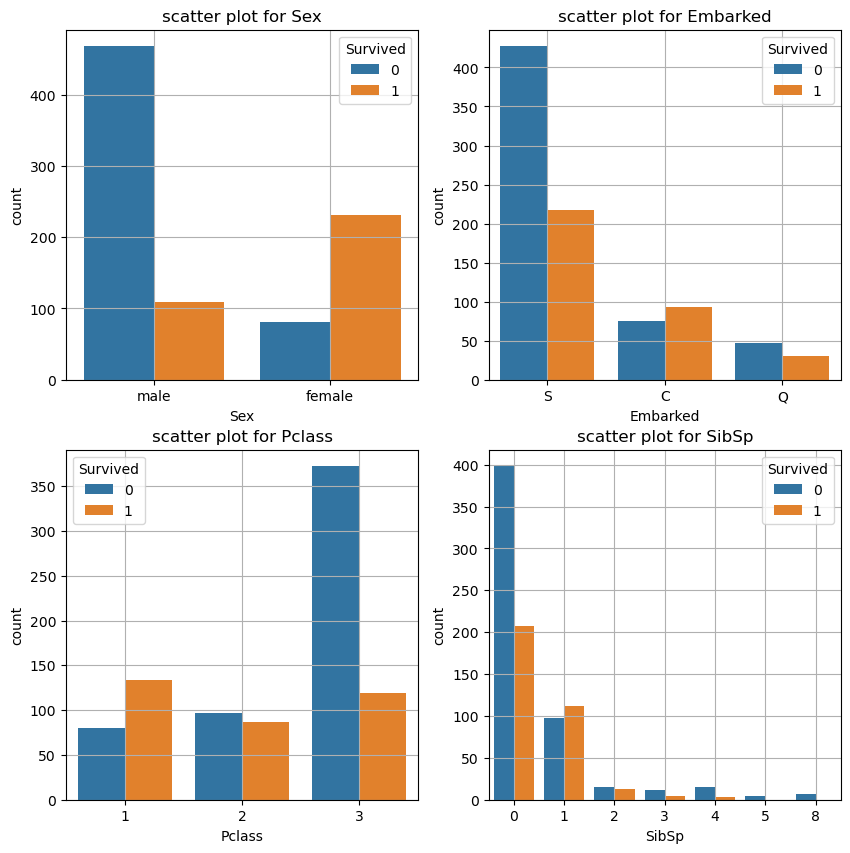

In [261]:

plt.figure(figsize=(10,10))
for i in range(0,len(cat_cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat_cols[i]],hue=df['Survived'])
    plt.title(f'scatter plot for {cat_cols[i]}')
    plt.grid()
plt.show()




Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton

Most people boarded for Southampton and could not survive

mostly Males died

In [262]:
df['Age_bins']=pd.cut(df['Age'],bins=list(range(25,85,5)))
df['Age_bins'].value_counts()

(25, 30]    285
(30, 35]     88
(35, 40]     66
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     13
(70, 75]      4
(65, 70]      3
(75, 80]      1
Name: Age_bins, dtype: int64

In [263]:
pt1=pd.pivot_table(data=df,columns=['Survived'],index=['Age_bins'],values=['Fare'])

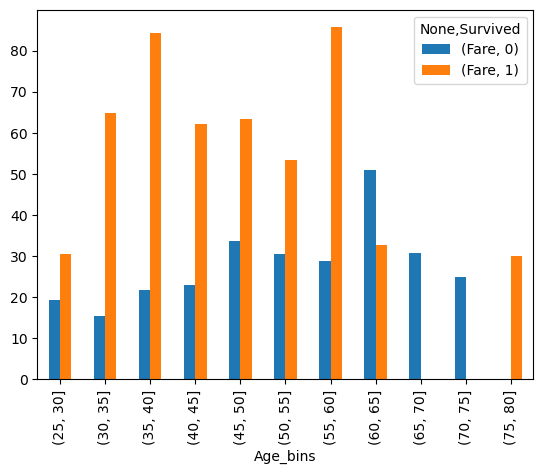

In [264]:
pt1.plot(kind='bar')
plt.show()

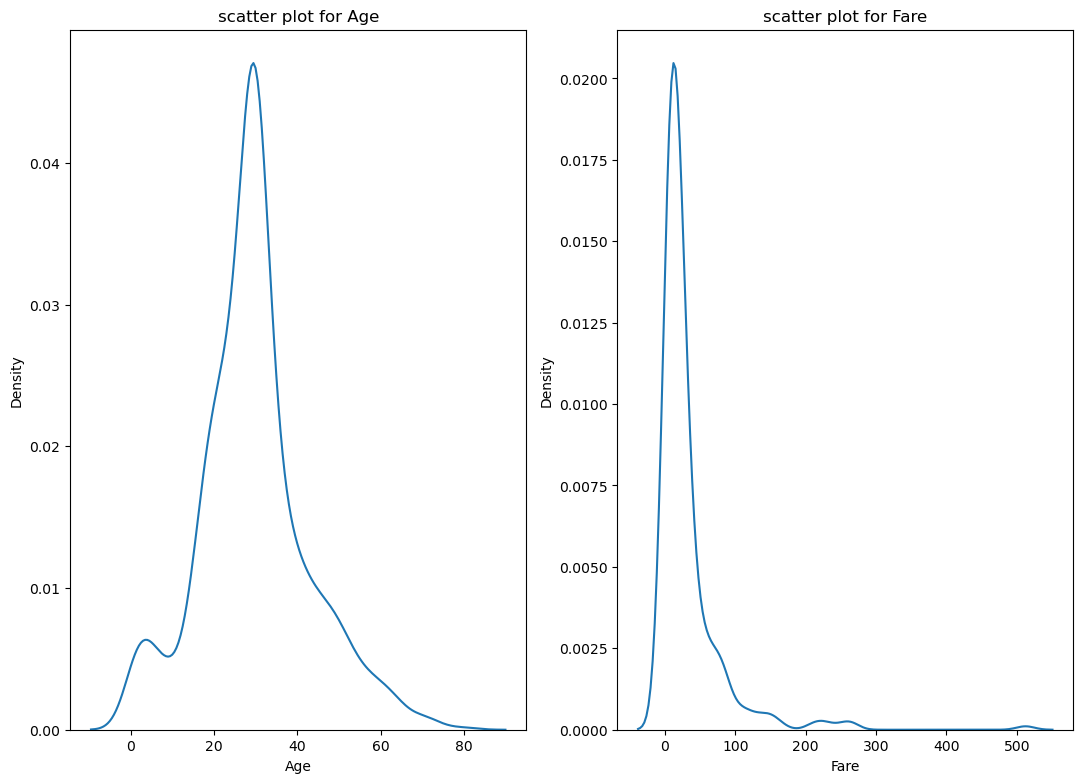

In [265]:
plt.figure(figsize=(20,20))
for i in range(0,len(cont_cols)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[cont_cols[i]])
    plt.title(f'scatter plot for {cont_cols[i]}')
    
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11200\354408529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


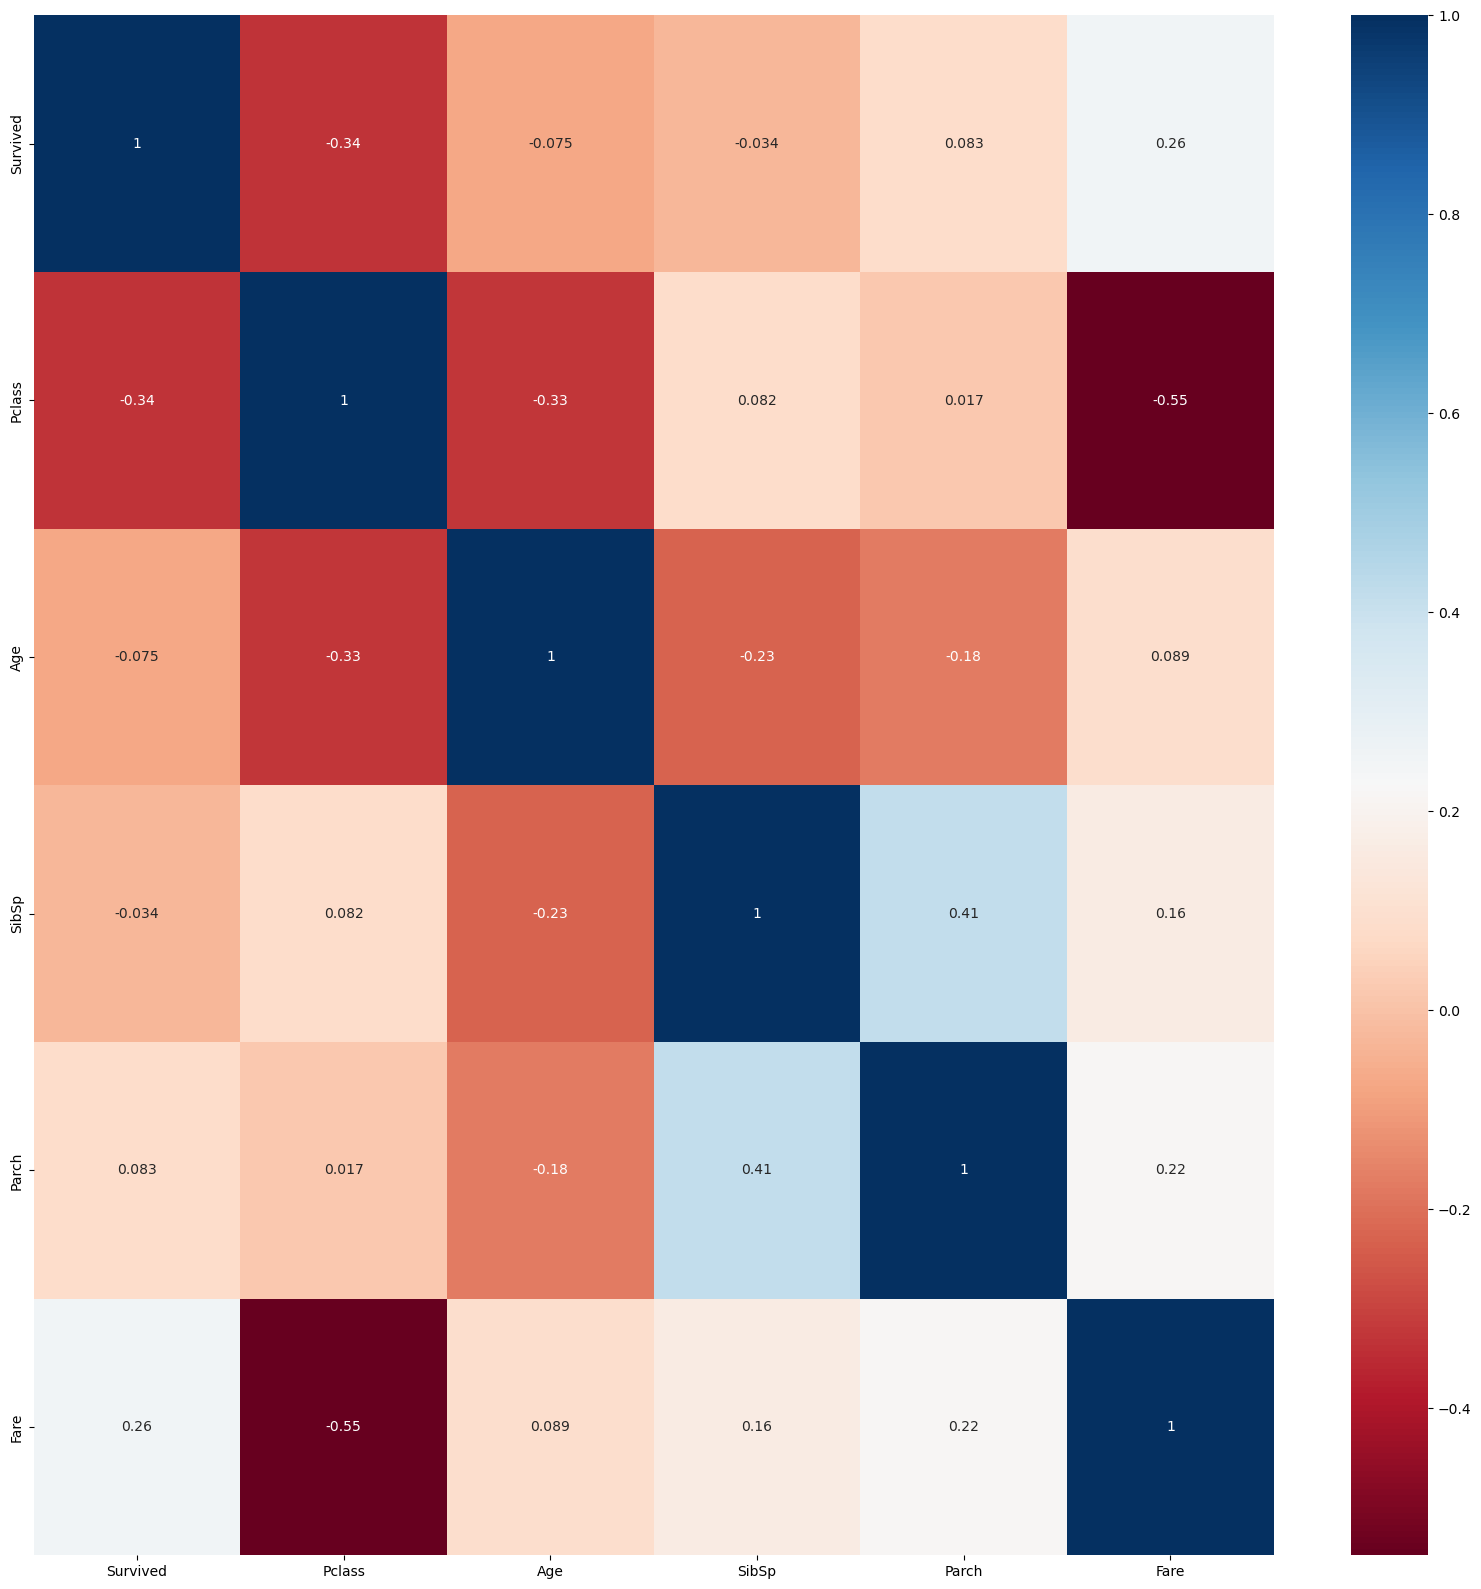

In [266]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


In [267]:
a=df.describe(percentiles=[0.01,0.02,0.05,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,5%,50%,98%,99%,max
Survived,0.00,0.0,0.0000,0.000,0.000000,1.0000,1.000000,1.0000
Pclass,1.00,1.0,1.0000,1.000,3.000000,3.0000,3.000000,3.0000
Age,0.42,1.0,2.0000,6.000,29.699118,61.2400,65.000000,80.0000
SibSp,0.00,0.0,0.0000,0.000,0.000000,4.0000,5.000000,8.0000
Parch,0.00,0.0,0.0000,0.000,0.000000,2.0000,4.000000,6.0000
Fare,0.00,0.0,6.3895,7.225,14.454200,211.3375,249.303304,512.3292


In [268]:
def outlier_treatment(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [269]:
df1=df.copy()

In [270]:
df[cont_cols]=df[cont_cols].apply(outlier_treatment)

In [271]:
df['Sex'] = df['Sex'].map({'female':1,'male':2})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bins
0,0,3,2,22.0,1,0,A/5 21171,7.2500,S,NaN
1,1,1,1,38.0,1,0,PC 17599,71.2833,C,"(35.0, 40.0]"
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,"(25.0, 30.0]"
3,1,1,1,35.0,1,0,113803,53.1000,S,"(30.0, 35.0]"
4,0,3,2,35.0,0,0,373450,8.0500,S,"(30.0, 35.0]"


In [272]:
df['Embarked'] = df['Embarked'].map({'S':1,'C':2,'Q':3})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bins
0,0,3,2,22.0,1,0,A/5 21171,7.2500,1,NaN
1,1,1,1,38.0,1,0,PC 17599,71.2833,2,"(35.0, 40.0]"
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1,"(25.0, 30.0]"
3,1,1,1,35.0,1,0,113803,53.1000,1,"(30.0, 35.0]"
4,0,3,2,35.0,0,0,373450,8.0500,1,"(30.0, 35.0]"


In [273]:
x=df.drop(['Survived','Age_bins','Ticket'],axis=1) 
y=df['Survived']
print(x.shape)
print(y.shape)

(889, 7)
(889,)


In [274]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,2,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,2,35.0,0,0,8.0500,1


In [275]:
from sklearn.model_selection import train_test_split

In [276]:
df['Embarked'].value_counts()

1    644
2    168
3     77
Name: Embarked, dtype: int64

In [277]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 7)
(267, 7)
(622,)
(267,)


# function to evaluate model

In [278]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score

In [279]:
def eval_model(ytest,ypred):
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print('Confusion Matrix',cm)
    print('Classification report',cr)
    
def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model(ytest,ypred)
    train_acc=model.score(xtrain,ytrain)
    test_acc=model.score(xtest,ytest)
    pre1=precision_score(ytest,ypred)
    rec1=recall_score(ytest,ypred)
    res= pd.DataFrame({'Train Acc':train_acc,'Test acc':test_acc,'Pre1':pre1,'Rec1':rec1},index=[model_name])
    return res

In [280]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [281]:
df['Sex'].value_counts()

2    577
1    312
Name: Sex, dtype: int64

In [282]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=25)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(random_state=25)

In [283]:
ypred_dt1=dt1.predict(x_test)
dt1_res= gen_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,['DT1(gini)'])
dt1_res

Confusion Matrix [[131  36]
 [ 29  71]]
Classification report               precision    recall  f1-score   support

           0       0.82      0.78      0.80       167
           1       0.66      0.71      0.69       100

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.76      0.76       267



,Train Acc,Test acc,Pre1,Rec1
DT1(gini),0.988746,0.756554,0.663551,0.71


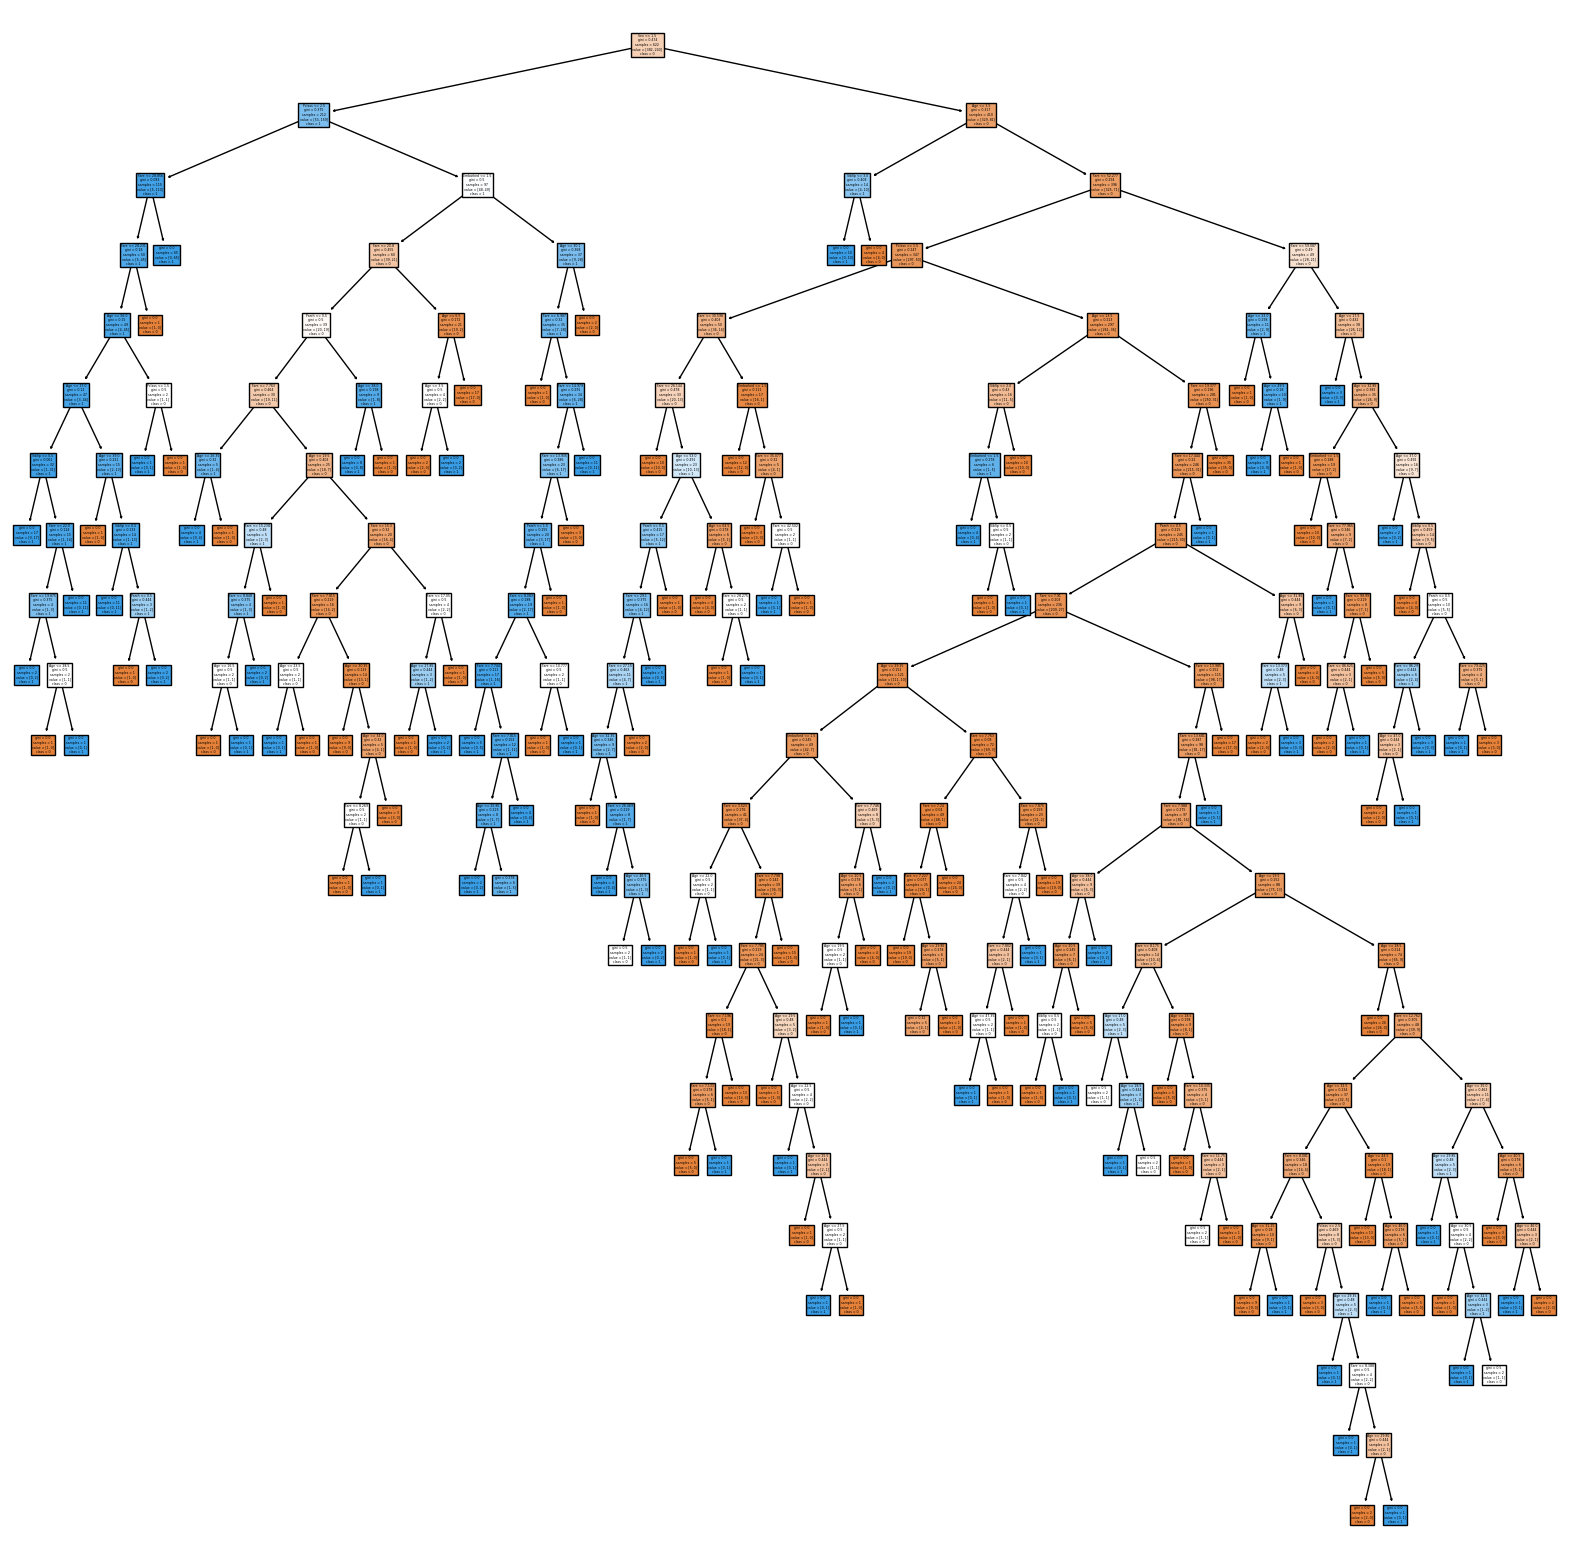

In [284]:
from sklearn.tree import plot_tree
cn=['0','1']
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

# model-2 dt2

In [285]:
dt2= DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=15,random_state=25)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=15, random_state=25)

In [286]:
ypred_dt2=dt2.predict(x_test)
dt2_res= gen_res(dt2,x_train,x_test,y_train,y_test,ypred_dt2,['DT2(gini,md=6,mss=15)'])
dt2_res

Confusion Matrix [[143  24]
 [ 25  75]]
Classification report               precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.76      0.75      0.75       100

    accuracy                           0.82       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



,Train Acc,Test acc,Pre1,Rec1
"DT2(gini,md=6,mss=15)",0.87299,0.816479,0.757576,0.75


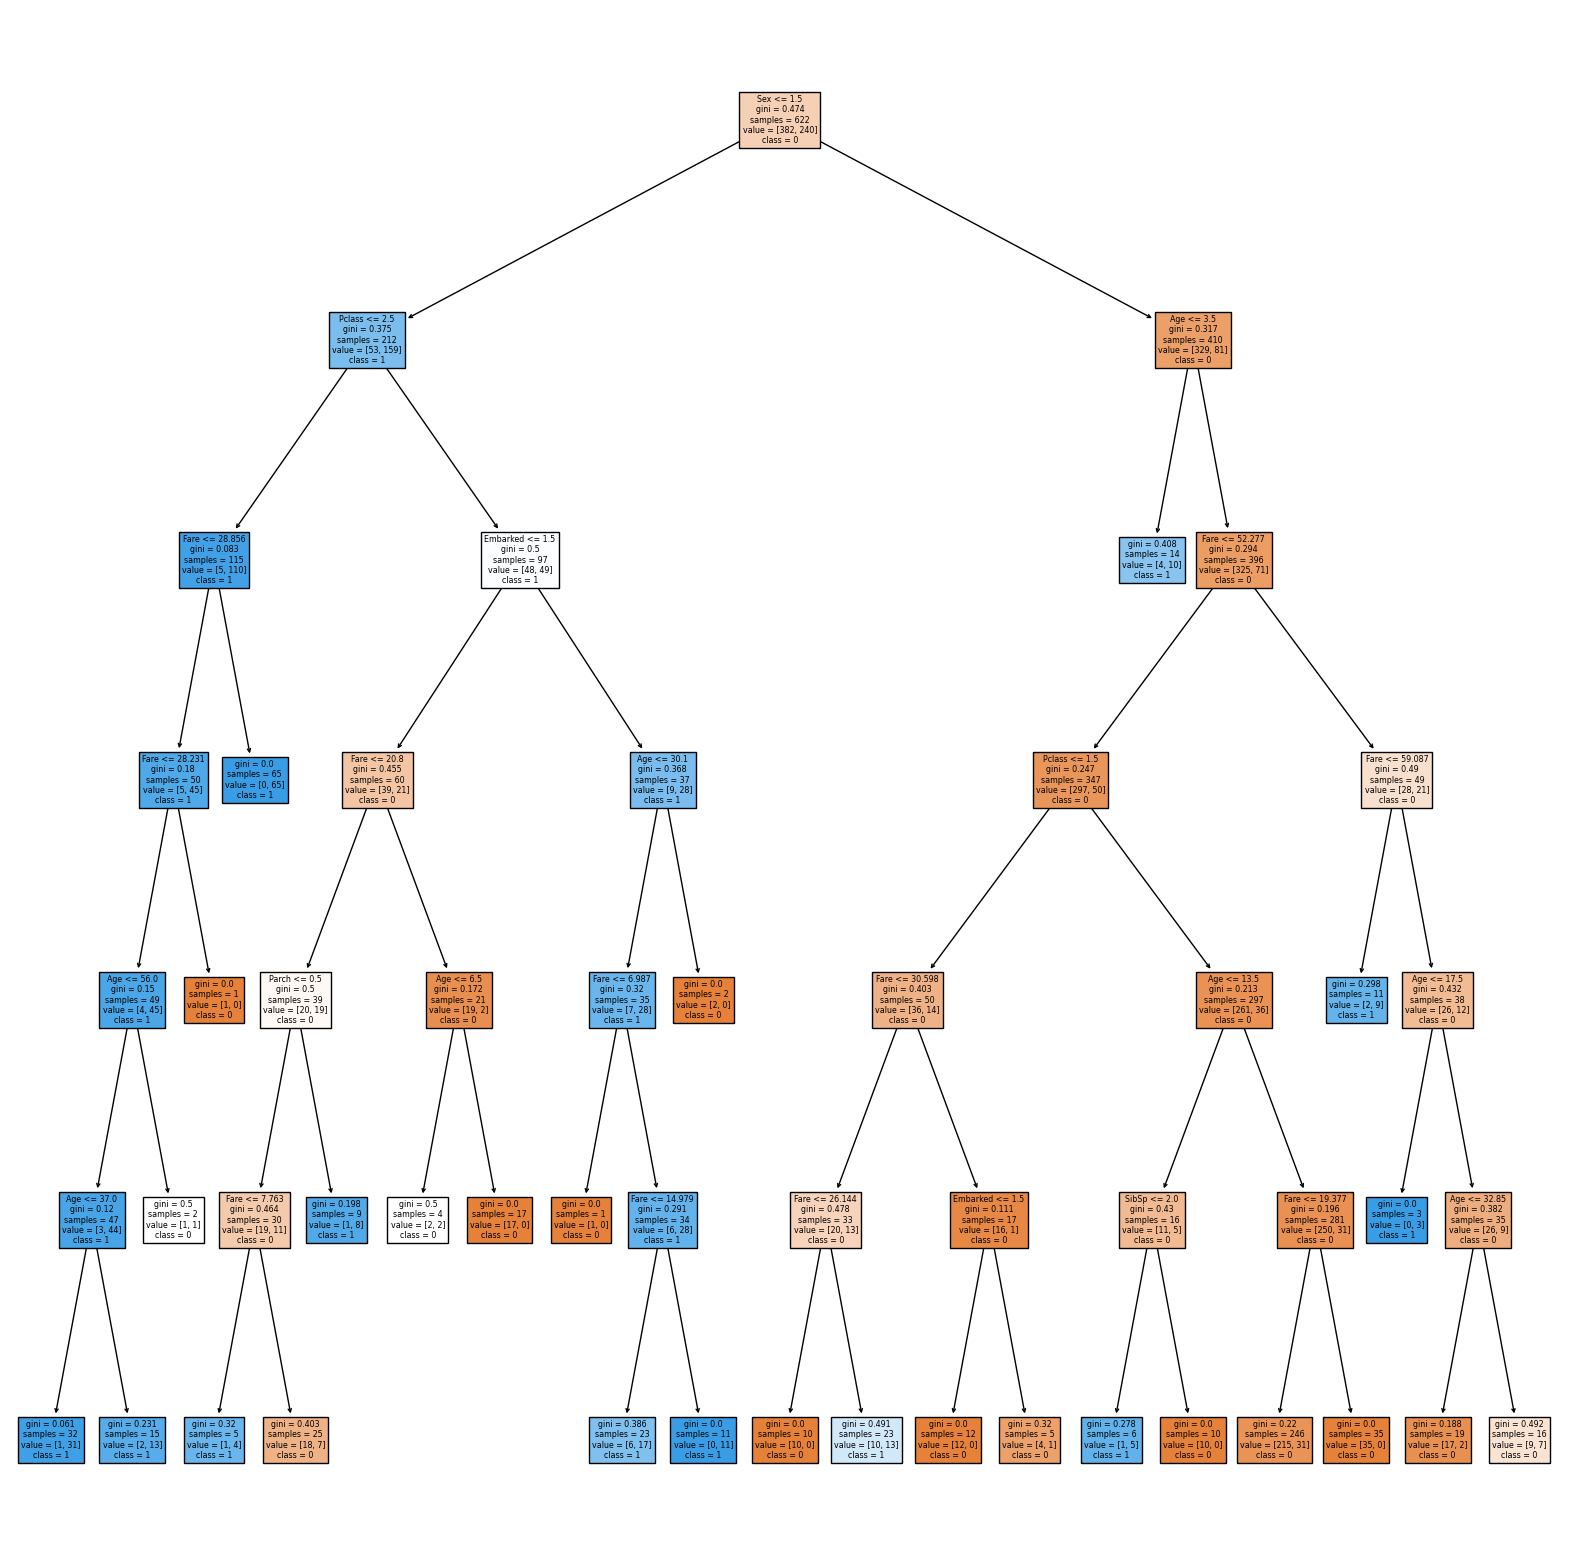

In [287]:
cn=['0','1']
plt.figure(figsize=(20,20))
plot_tree(dt2,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

# model 3 dt3

In [290]:
dt3= DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=20,random_state=25)
dt3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       random_state=25)

In [291]:
ypred_dt3=dt3.predict(x_test)
dt3_res= gen_res(dt3,x_train,x_test,y_train,y_test,ypred_dt3,['DT3(gini,md=6,mss=15)'])
dt3_res

Confusion Matrix [[155  12]
 [ 36  64]]
Classification report               precision    recall  f1-score   support

           0       0.81      0.93      0.87       167
           1       0.84      0.64      0.73       100

    accuracy                           0.82       267
   macro avg       0.83      0.78      0.80       267
weighted avg       0.82      0.82      0.81       267



,Train Acc,Test acc,Pre1,Rec1
"DT3(gini,md=6,mss=15)",0.874598,0.820225,0.842105,0.64


In [292]:
# hyperp

In [293]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [294]:
hparams={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8],'min_samples_split':[8,10,12,15,20]}

# GridSearchCV

In [295]:
dt_model=DecisionTreeClassifier(random_state=0)
gs1=GridSearchCV(dt_model,param_grid=hparams,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [300]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=0)
0.8199225806451613


In [301]:
#analysis :

In [302]:
gs1_res=pd.DataFrame(gs1.cv_results_)
gs1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006595,0.001201,0.003999,0.001097,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.792,0.848,0.806452,0.806452,0.830645,0.816710,0.019972,15
1,0.004397,0.000490,0.002598,0.000490,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.792,0.848,0.806452,0.806452,0.830645,0.816710,0.019972,15
2,0.004398,0.000799,0.002798,0.000748,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.792,0.848,0.798387,0.806452,0.830645,0.815097,0.021032,21
3,0.004597,0.000799,0.002998,0.000632,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.784,0.848,0.798387,0.790323,0.830645,0.810271,0.024771,29
4,0.005398,0.001199,0.003198,0.000400,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.784,0.848,0.798387,0.790323,0.830645,0.810271,0.024771,29


In [303]:
gs1_res.shape

(50, 16)

In [304]:
gs1_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [305]:
gs1_res=gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','mean_test_score','rank_test_score']]
gs1_res.head()

,param_criterion,param_max_depth,param_min_samples_split,mean_test_score,rank_test_score
0,gini,4,8,0.816710,15
1,gini,4,10,0.816710,15
2,gini,4,12,0.815097,21
3,gini,4,15,0.810271,29
4,gini,4,20,0.810271,29


In [309]:
dt4= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10,random_state=25)
dt4.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=25)

In [310]:
ypred_dt4=dt4.predict(x_test)
dt4_res= gen_res(dt4,x_train,x_test,y_train,y_test,ypred_dt4,['DT4(gini,md=5,mss=10)'])
dt4_res

Confusion Matrix [[150  17]
 [ 34  66]]
Classification report               precision    recall  f1-score   support

           0       0.82      0.90      0.85       167
           1       0.80      0.66      0.72       100

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



,Train Acc,Test acc,Pre1,Rec1
"DT4(gini,md=5,mss=10)",0.864952,0.808989,0.795181,0.66
